In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

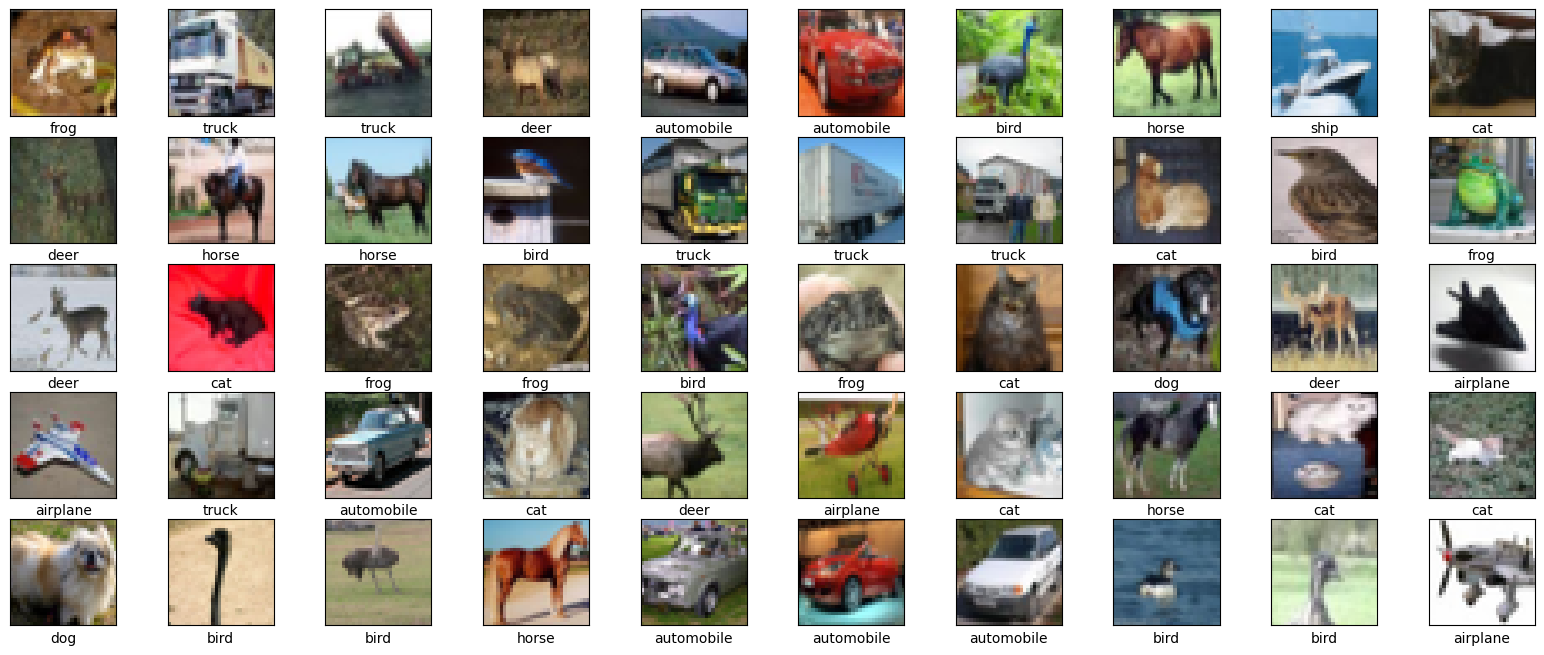

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [13]:
model_adam = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),

    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])
model_adam.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 64)         

In [14]:
model_adam.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
h = model_adam.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 36s 29ms/step - loss: 1.6950 - accuracy: 0.3783 - val_loss: 1.5080 - val_accuracy: 0.4450
Epoch 2/10
1250/1250 [==============================] - 35s 28ms/step - loss: 1.3737 - accuracy: 0.5026 - val_loss: 1.3025 - val_accuracy: 0.5310
Epoch 3/10
1250/1250 [==============================] - 35s 28ms/step - loss: 1.2419 - accuracy: 0.5562 - val_loss: 1.1944 - val_accuracy: 0.5734
Epoch 4/10
1250/1250 [==============================] - 35s 28ms/step - loss: 1.1521 - accuracy: 0.5896 - val_loss: 1.1619 - val_accuracy: 0.5854
Epoch 5/10
1250/1250 [==============================] - 34s 27ms/step - loss: 1.0780 - accuracy: 0.6183 - val_loss: 1.0934 - val_accuracy: 0.6162
Epoch 6/10
1250/1250 [==============================] - 35s 28ms/step - loss: 1.0185 - accuracy: 0.6393 - val_loss: 1.0794 - val_accuracy: 0.6226
Epoch 7/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.9688 - accuracy: 0.6574 - val_loss: 1.0536 -

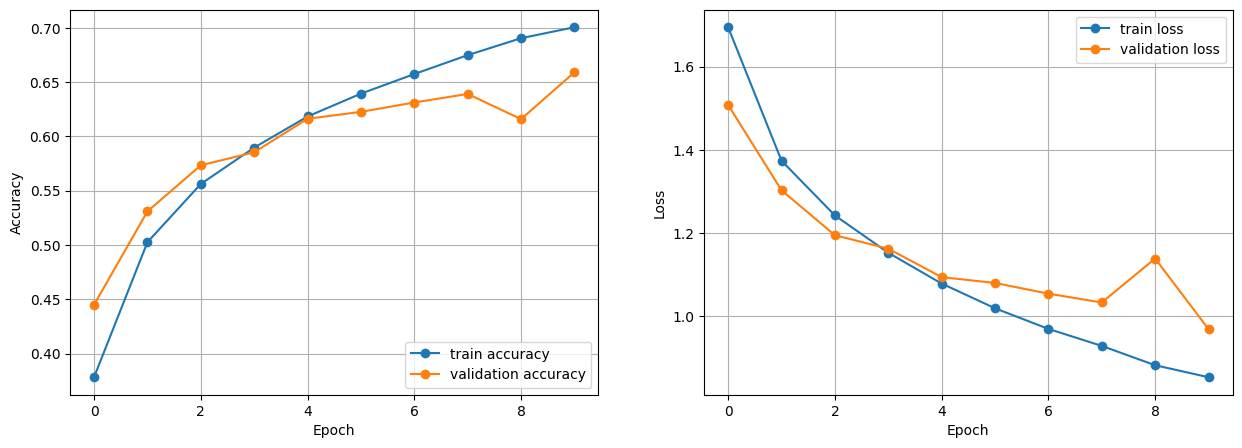

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [26]:
test_loss, test_acc = model_adam.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 3s 9ms/step - loss: 0.9750 - accuracy: 0.6636

Test Accuracy: 0.6636000275611877

Test Loss: 0.9749682545661926


In [21]:
model_sgd = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),

    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])
model_sgd.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 64)         

In [22]:
model_sgd.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
h = model_sgd.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 39s 31ms/step - loss: 2.1269 - accuracy: 0.2120 - val_loss: 1.9288 - val_accuracy: 0.2977
Epoch 2/10
1250/1250 [==============================] - 39s 31ms/step - loss: 1.7766 - accuracy: 0.3590 - val_loss: 1.6217 - val_accuracy: 0.4156
Epoch 3/10
1250/1250 [==============================] - 37s 30ms/step - loss: 1.5582 - accuracy: 0.4385 - val_loss: 1.5041 - val_accuracy: 0.4629
Epoch 4/10
1250/1250 [==============================] - 40s 32ms/step - loss: 1.4472 - accuracy: 0.4812 - val_loss: 1.4341 - val_accuracy: 0.4864
Epoch 5/10
1250/1250 [==============================] - 36s 29ms/step - loss: 1.3685 - accuracy: 0.5111 - val_loss: 1.3322 - val_accuracy: 0.5306
Epoch 6/10
1250/1250 [==============================] - 35s 28ms/step - loss: 1.3055 - accuracy: 0.5362 - val_loss: 1.2992 - val_accuracy: 0.5355
Epoch 7/10
1250/1250 [==============================] - 36s 29ms/step - loss: 1.2452 - accuracy: 0.5571 - val_loss: 1.2459 -

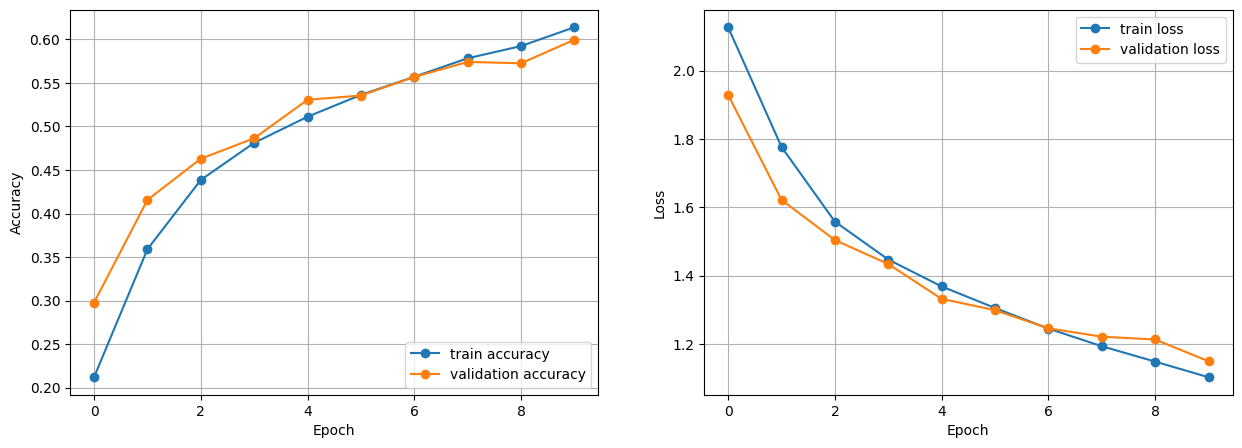

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [25]:
test_loss, test_acc = model_sgd.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 4s 11ms/step - loss: 1.1496 - accuracy: 0.5954

Test Accuracy: 0.5953999757766724

Test Loss: 1.1496145725250244


In [27]:
model_rmsProp = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),

    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])
model_rmsProp.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 2, 2, 64)         

In [28]:
model_rmsProp.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
h = model_rmsProp.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 39s 31ms/step - loss: 1.6968 - accuracy: 0.3826 - val_loss: 1.4048 - val_accuracy: 0.4965
Epoch 2/10
1250/1250 [==============================] - 36s 29ms/step - loss: 1.3196 - accuracy: 0.5307 - val_loss: 1.1709 - val_accuracy: 0.5912
Epoch 3/10
1250/1250 [==============================] - 34s 27ms/step - loss: 1.1463 - accuracy: 0.5935 - val_loss: 1.1298 - val_accuracy: 0.6054
Epoch 4/10
1250/1250 [==============================] - 35s 28ms/step - loss: 1.0364 - accuracy: 0.6359 - val_loss: 1.1005 - val_accuracy: 0.6275
Epoch 5/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.9523 - accuracy: 0.6676 - val_loss: 1.0096 - val_accuracy: 0.6460
Epoch 6/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.8795 - accuracy: 0.6920 - val_loss: 1.0586 - val_accuracy: 0.6417
Epoch 7/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.8227 - accuracy: 0.7124 - val_loss: 0.9461 -

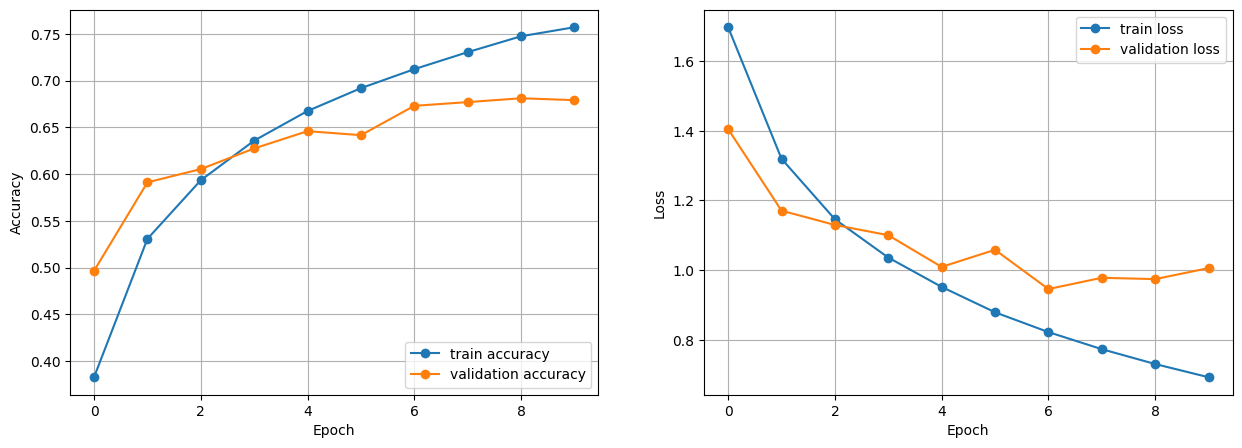

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [31]:
test_loss, test_acc = model_rmsProp.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 3s 11ms/step - loss: 0.9957 - accuracy: 0.6833

Test Accuracy: 0.6833000183105469

Test Loss: 0.9956504106521606
